In [157]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [158]:
# Load the dataset
data = pd.read_csv('sample.csv')

In [159]:
#create a column in the data DataFrame
features = ['length_width_ratio', 'Stem_height', 'No_of_leaves', 'Angle_of_Leaf', 'Species']
data.columns = features
#inspect data
data.head()

,length_width_ratio,Stem_height,No_of_leaves,Angle_of_Leaf,Species
0,15.0,6,60.0,45,Neomarica longifolia
1,10.9,7,80.0,30,Sorghum halepense
2,9.3,12,35.0,60,Pandanus amaryllifolius
3,21.1,8,59.0,50,Neomarica longifolia
4,22.5,9,98.0,35,Sorghum halepense


In [160]:
# dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   length_width_ratio  110 non-null    float64
 1   Stem_height         110 non-null    int64  
 2   No_of_leaves        110 non-null    float64
 3   Angle_of_Leaf       110 non-null    int64  
 4   Species             110 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ KB


In [161]:
# for each of the categorical columns, lets see the unique values
for i in data.columns:
    # print(i)
    if data[i].dtype == object:
        print(data[i].unique())


['Neomarica longifolia' 'Sorghum halepense' 'Pandanus amaryllifolius']


In [162]:
# Extract features and target variable
X = data.drop('Species', axis=1)
y = data['Species']


# Preview features
X.head()

,length_width_ratio,Stem_height,No_of_leaves,Angle_of_Leaf
0,15.0,6,60.0,45
1,10.9,7,80.0,30
2,9.3,12,35.0,60
3,21.1,8,59.0,50
4,22.5,9,98.0,35


In [163]:
# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [164]:
# Encode the categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [165]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:


# Define the number of features and classes based on your dataset
num_features = X_train.shape[1]  # Assuming X_train is your feature matrix
num_classes = len(np.unique(y_train))  # Assuming y_train is your label vector

# Define the neural network model
model = Sequential([
Dense(64, activation='relu', input_shape=(num_features,)),
Dropout(0.5),
Dense(64, activation='relu'), 
Dropout(0.5),
Dense(num_classes, activation='softmax')
])

In [173]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [174]:
 #Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
history = model.fit(X_train, y_train, batch_size=256, epochs=300,
                    verbose=1, validation_split=0.2, callbacks=[early_stopping])




Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2714 - loss: 1.1545 - val_accuracy: 0.0556 - val_loss: 1.1266
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2286 - loss: 1.1481 - val_accuracy: 0.0556 - val_loss: 1.0962
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3429 - loss: 1.0850 - val_accuracy: 0.1111 - val_loss: 1.0673
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3571 - loss: 1.1532 - val_accuracy: 0.1111 - val_loss: 1.0400
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4571 - loss: 1.0245 - val_accuracy: 0.3889 - val_loss: 1.0131
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5286 - loss: 1.0163 - val_accuracy: 0.5556 - val_loss: 0.9874
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4286 - loss: 1.0179 - val_accuracy: 0.6667 - val_loss: 0.9625
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5286 - loss: 1.0231 - val_accuracy: 0.6667 - val_loss: 0

In [177]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model on train and test sets
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Accuracy: {train_accuracy}')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Print classification report and confusion matrix
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred))

print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9499 - loss: 0.2033 
Train Loss: 0.21288593113422394
Train Accuracy: 0.9545454382896423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9091 - loss: 0.2563
Test Loss: 0.2562521994113922
Test Accuracy: 0.9090909361839294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.80      1.00      0.89         4
           2       0.83      1.00      0.91         5

    accuracy                           0.91        22
   macro avg       0.88      0.95      0.90        22
weighted avg       0.93      0.91      0.91        22

Test Set Confusion Matrix:
[[11  1  1]
 [ 0  4  0]
 [ 0  0  5]]


In [178]:
# Qualitative assessment
# Correct classifications
correct_indices = np.where(y_pred == y_test)[0]
correct_examples = X_test[correct_indices[:5]]  # Displaying only first 5 correct examples
print("Correctly classified examples:")
for i, example in enumerate(correct_examples):
    print(f"Example {i+1}: {example}")

# Incorrect classifications
incorrect_indices = np.where(y_pred != y_test)[0]
incorrect_examples = X_test[incorrect_indices[:5]]  # Displaying only first 5 incorrect examples
print("\nIncorrectly classified examples:")
for i, example in enumerate(incorrect_examples):
    print(f"Example {i+1}: {example}")

Correctly classified examples:
Example 1: [ 0.96507732 -0.72571166 -0.5514331  -0.42702898]
Example 2: [-0.4850497  -0.34975429  0.63418283 -1.59165346]
Example 3: [ 0.41264798 -0.22443516  0.94014823 -0.42702898]
Example 4: [ 0.76942526 -0.34975429  0.55769148 -0.81523714]
Example 5: [-0.74975543  0.52747959 -0.32195905  1.12580367]

Incorrectly classified examples:
Example 1: [ 0.40113903 -0.47507341  0.48120013 -0.42702898]
Example 2: [-0.45052287 -0.60039254 -0.51318742  0.34938734]


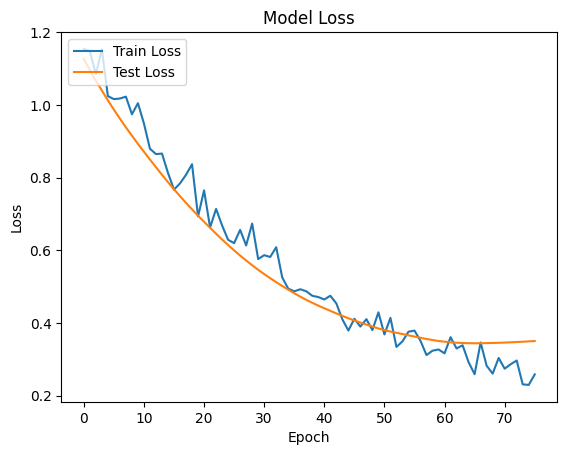

In [179]:
# Plot the performance metrics
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

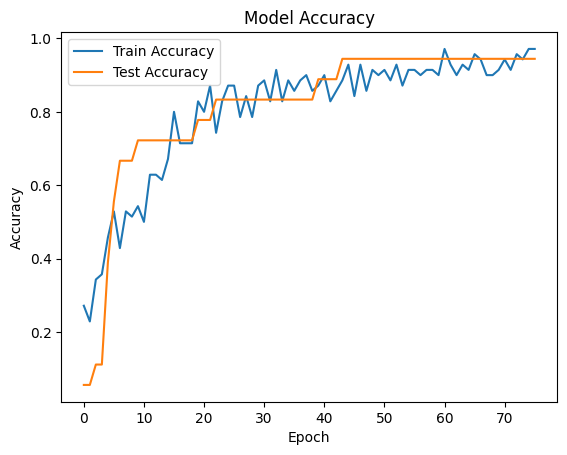

In [180]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()